In [ ]:
# Exploration of data : Usual steps
# How large is the dataset -> df.shape
# Completeness of the data -> df.info
# Summary statistics (by column type) -> df.describe, mean, mode, median, quartiles etc
# Data Visualization -> pairplot, histogram
# Missing Data Analysis -> df.isnull
# Outliers -> box-plot, statistical tools, (z-score)
# Correlation Analysis -> heatmap
# Timeseries data: seasonality, trends etc
# Target analysis - For supervised dataset

In [ ]:
import pandas as pd

def read_dataset(path: str) -> pd.DataFrame:
  try:
    with open(path) as f:
      return pd.read_csv(path)
  except(FileExistsError, FileNotFoundError) as e:
    print(f"File not found error {e}")

In [ ]:
df = read_dataset("airlines_flights_data.csv")
df.shape

(300153, 12)

In [ ]:
# Get a Sample of the data
df.sample(n=10)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
54001,54001,AirAsia,I5-330,Mumbai,Night,one,Afternoon,Bangalore,Economy,13.50,9,7192
96279,96279,Indigo,6E-6017,Bangalore,Evening,one,Late_Night,Mumbai,Economy,6.08,15,5178
181991,181991,Indigo,6E-605,Chennai,Afternoon,one,Night,Delhi,Economy,9.08,14,7877
191841,191841,Air_India,AI-538,Chennai,Night,one,Evening,Mumbai,Economy,21.67,34,4357
238102,238102,Vistara,UK-928,Mumbai,Early_Morning,one,Evening,Hyderabad,Business,12.92,3,59469
138569,138569,Air_India,AI-768,Kolkata,Afternoon,one,Late_Night,Bangalore,Economy,8.67,23,7999
297003,297003,Vistara,UK-826,Chennai,Afternoon,one,Evening,Kolkata,Business,7.42,26,54896
137290,137290,GO_FIRST,G8-102,Kolkata,Afternoon,one,Night,Bangalore,Economy,7.08,15,6488
197682,197682,Vistara,UK-834,Chennai,Evening,one,Morning,Bangalore,Economy,15.58,48,6161
231195,231195,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Bangalore,Business,15.17,15,69168


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
rows_with_nan = df[df.isnull().any(axis=1)]
print(rows_with_nan)
#Empty Dataframe = No NaN rows

Empty DataFrame
Columns: [index, airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []


In [ ]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<Axes: xlabel='price'>

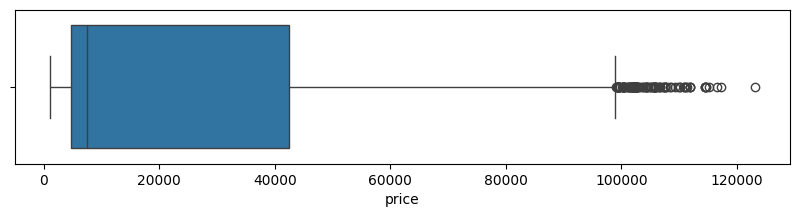

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
sns.boxplot(data=df,x = "price")

In [ ]:

def is_outlier(x: pd.Series, criteria =3):
  x_bar = x.mean()
  std_dev = x.std()
  is_outlier =abs(x-x_bar)/std_dev > criteria
  return is_outlier

is_outlier = is_outlier(df["price"])

In [ ]:
df[is_outlier].shape

(602, 12)

In [ ]:
df["stops"].value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df["airline"].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
for column in df.columns:
  if isinstance(column, object):
    print(df[column].value_counts())

index
300152    1
0         1
1         1
2         1
3         1
         ..
13        1
12        1
11        1
10        1
9         1
Name: count, Length: 300153, dtype: int64
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
N

In [ ]:
df["price"].dtype

dtype('int64')

In [ ]:
print(set(df["flight"]))

{'G8-1171', '6E-905', '6E-2053', 'I5-1427', '6E-6206', '6.00E-251', 'SG-5075', '6E-5327', 'UK-845', 'AI-629', '6E-6178', '6E-6572', 'AI-479', 'SG-3283', 'G8-7545', '6E-6326', 'G8-7553', '6E-7292', 'G8-625', '6E-6223', '6E-7288', '6.00E-289', '6E-318', 'UK-708', 'UK-839', 'UK-836', '6E-5393', '6E-5031', 'SG-209', 'I5-2472', 'G8-1404', 'AI-9991', 'AI-9911', '6.00E-113', 'AI-615', 'SG-634', '6E-2618', '6.00E-136', 'G8-509', '6E-2057', '6E-761', '6E-613', '6E-417', 'G8-330', '6E-469', 'SG-2508', 'SG-3835', 'UK-741', 'UK-841', '6E-2036', '6E-725', 'I5-1518', 'G8-151', 'G8-244', '6E-7201', '6E-5316', 'AI-9929', 'UK-975', 'G8-294', '6E-895', 'G8-602', '6E-6086', 'G8-2506', '6E-952', 'G8-2201', 'G8-7546', 'AI-738', '6E-6917', 'AI-895', 'I5-1543', '6E-5003', 'SG-1090', '6E-478', 'G8-351', '6E-5302', '6E-6593', '6.00E-276', 'UK-811', 'SG-438', '6.00E-232', 'I5-722', '6E-6307', '6E-822', 'AI-695', 'G8-626', 'AI-9876', '6E-788', 'AI-811', '6E-998', '6E-5368', '6E-2373', '6E-354', '6E-847', '6E-620

In [ ]:
categorical_features = ["airline","source_city","departure_time","arrival_time","destination_city","class"]
numerical_features = ["stops","duration","days_left"]
target = "price"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One hot encode our categorical variables
#sparse_output = False allows us to get a dataFrame output
#handle_unknown = "ignore" is important so that new data are considered during production
ohe = OneHotEncoder(sparse_output=False,handle_unknown="ignore")
transform_data = ColumnTransformer(transformers=[("onehot",ohe,categorical_features)],remainder="passthrough")
#passthrough indicates that there will be other features which will not be one hot encoded


In [ ]:

data = transform_data.fit_transform(df)


In [ ]:
features = transform_data.get_feature_names_out()
df_encoded = pd.DataFrame(data, columns=features)

In [ ]:
df_encoded.columns = df_encoded.columns.str.replace("onehot__","")
df_encoded.columns = df_encoded.columns.str.replace("remainder__","")

In [ ]:
df_encoded.drop("flight",axis=1, inplace=True)

In [ ]:
"flight" in df_encoded.columns

False

In [ ]:
stops_mapping = {
    "zero": 0,
    "one": 1,
    "two_or_more": 2
}

if "stops" in df_encoded.columns:
    df_encoded["stops"] = df["stops"].map(stops_mapping)

In [ ]:
#Replace remainder__ in column names
# Drop flight
# cast labels in "stops" to 0,1 and 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
final_features = list(df_encoded.columns)
final_features.remove("price")
X = df_encoded[final_features]
y=df_encoded["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predicted_price = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

pd.DataFrame(predicted_price)

,0
0,7328.18
1,70383.74
2,6195.00
3,60478.08
4,6527.40
...,...
90041,6303.23
90042,67078.37
90043,2461.09
90044,2931.68
